In [1]:
import itertools
import matplotlib.pyplot as plt

In [2]:
def P_n(p, n):
    P = 0
    combo = list(itertools.combinations(p, n))
    for case in combo:
        tmp_p = []
        for el in p:
            tmp_p.append(el)
        tmp = 1
        tmp_case = []
        for elem in case:
            tmp *= elem
            tmp_case.append(elem)
            print('+:', elem, end = ' | ')
        for ver in p:
            if ver in tmp_case:
                tmp_p.pop(tmp_p.index(ver))
                tmp_case.pop(tmp_case.index(ver))
        for ver in tmp_p:
            tmp *= 1 - ver
            print('-:', round(1 - ver, 5), end = ' | ')
        print('P =', round(tmp, 5))
        P += tmp
        tmp_p = p
    return round(P, 5)

In [9]:
n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
p = [0.16, 0.58, 0.07, 0.24, 0.55, 0.34, 0.74, 0.43, 0.31]
P_sum, P = [], []
for case in n:
    P.append(P_n(p, case))
    if case != 0:
        P_sum.append(P[-1]+ P_sum[-1])
    else:
        P_sum.append(P[-1])
    
print(P)
print(P_sum)

-: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.00757
+: 0.16 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.00144
+: 0.58 | -: 0.84 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.01046
+: 0.07 | -: 0.84 | -: 0.42 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.00057
+: 0.24 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.00239
+: 0.55 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.66 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.00926
+: 0.34 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.26 | -: 0.57 | -: 0.69 | P = 0.0039
+: 0.74 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.57 | -: 0.69 | P = 0.02155
+: 0.43 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 0.69 | P = 0.00571
+: 0.31 | -: 0.84 | -: 0.42 | -: 0.93 | -: 0.76 | -: 0.45 | -: 0.66 | -: 0.26 | -: 

In [11]:
m_sr = 0
for value in P_sum:
    m_sr += (1 - value)
print('В среднем будет сбито', round(m_sr, 3), 'бомбардировщика')

В среднем будет сбито 3.42 бомбардировщиков


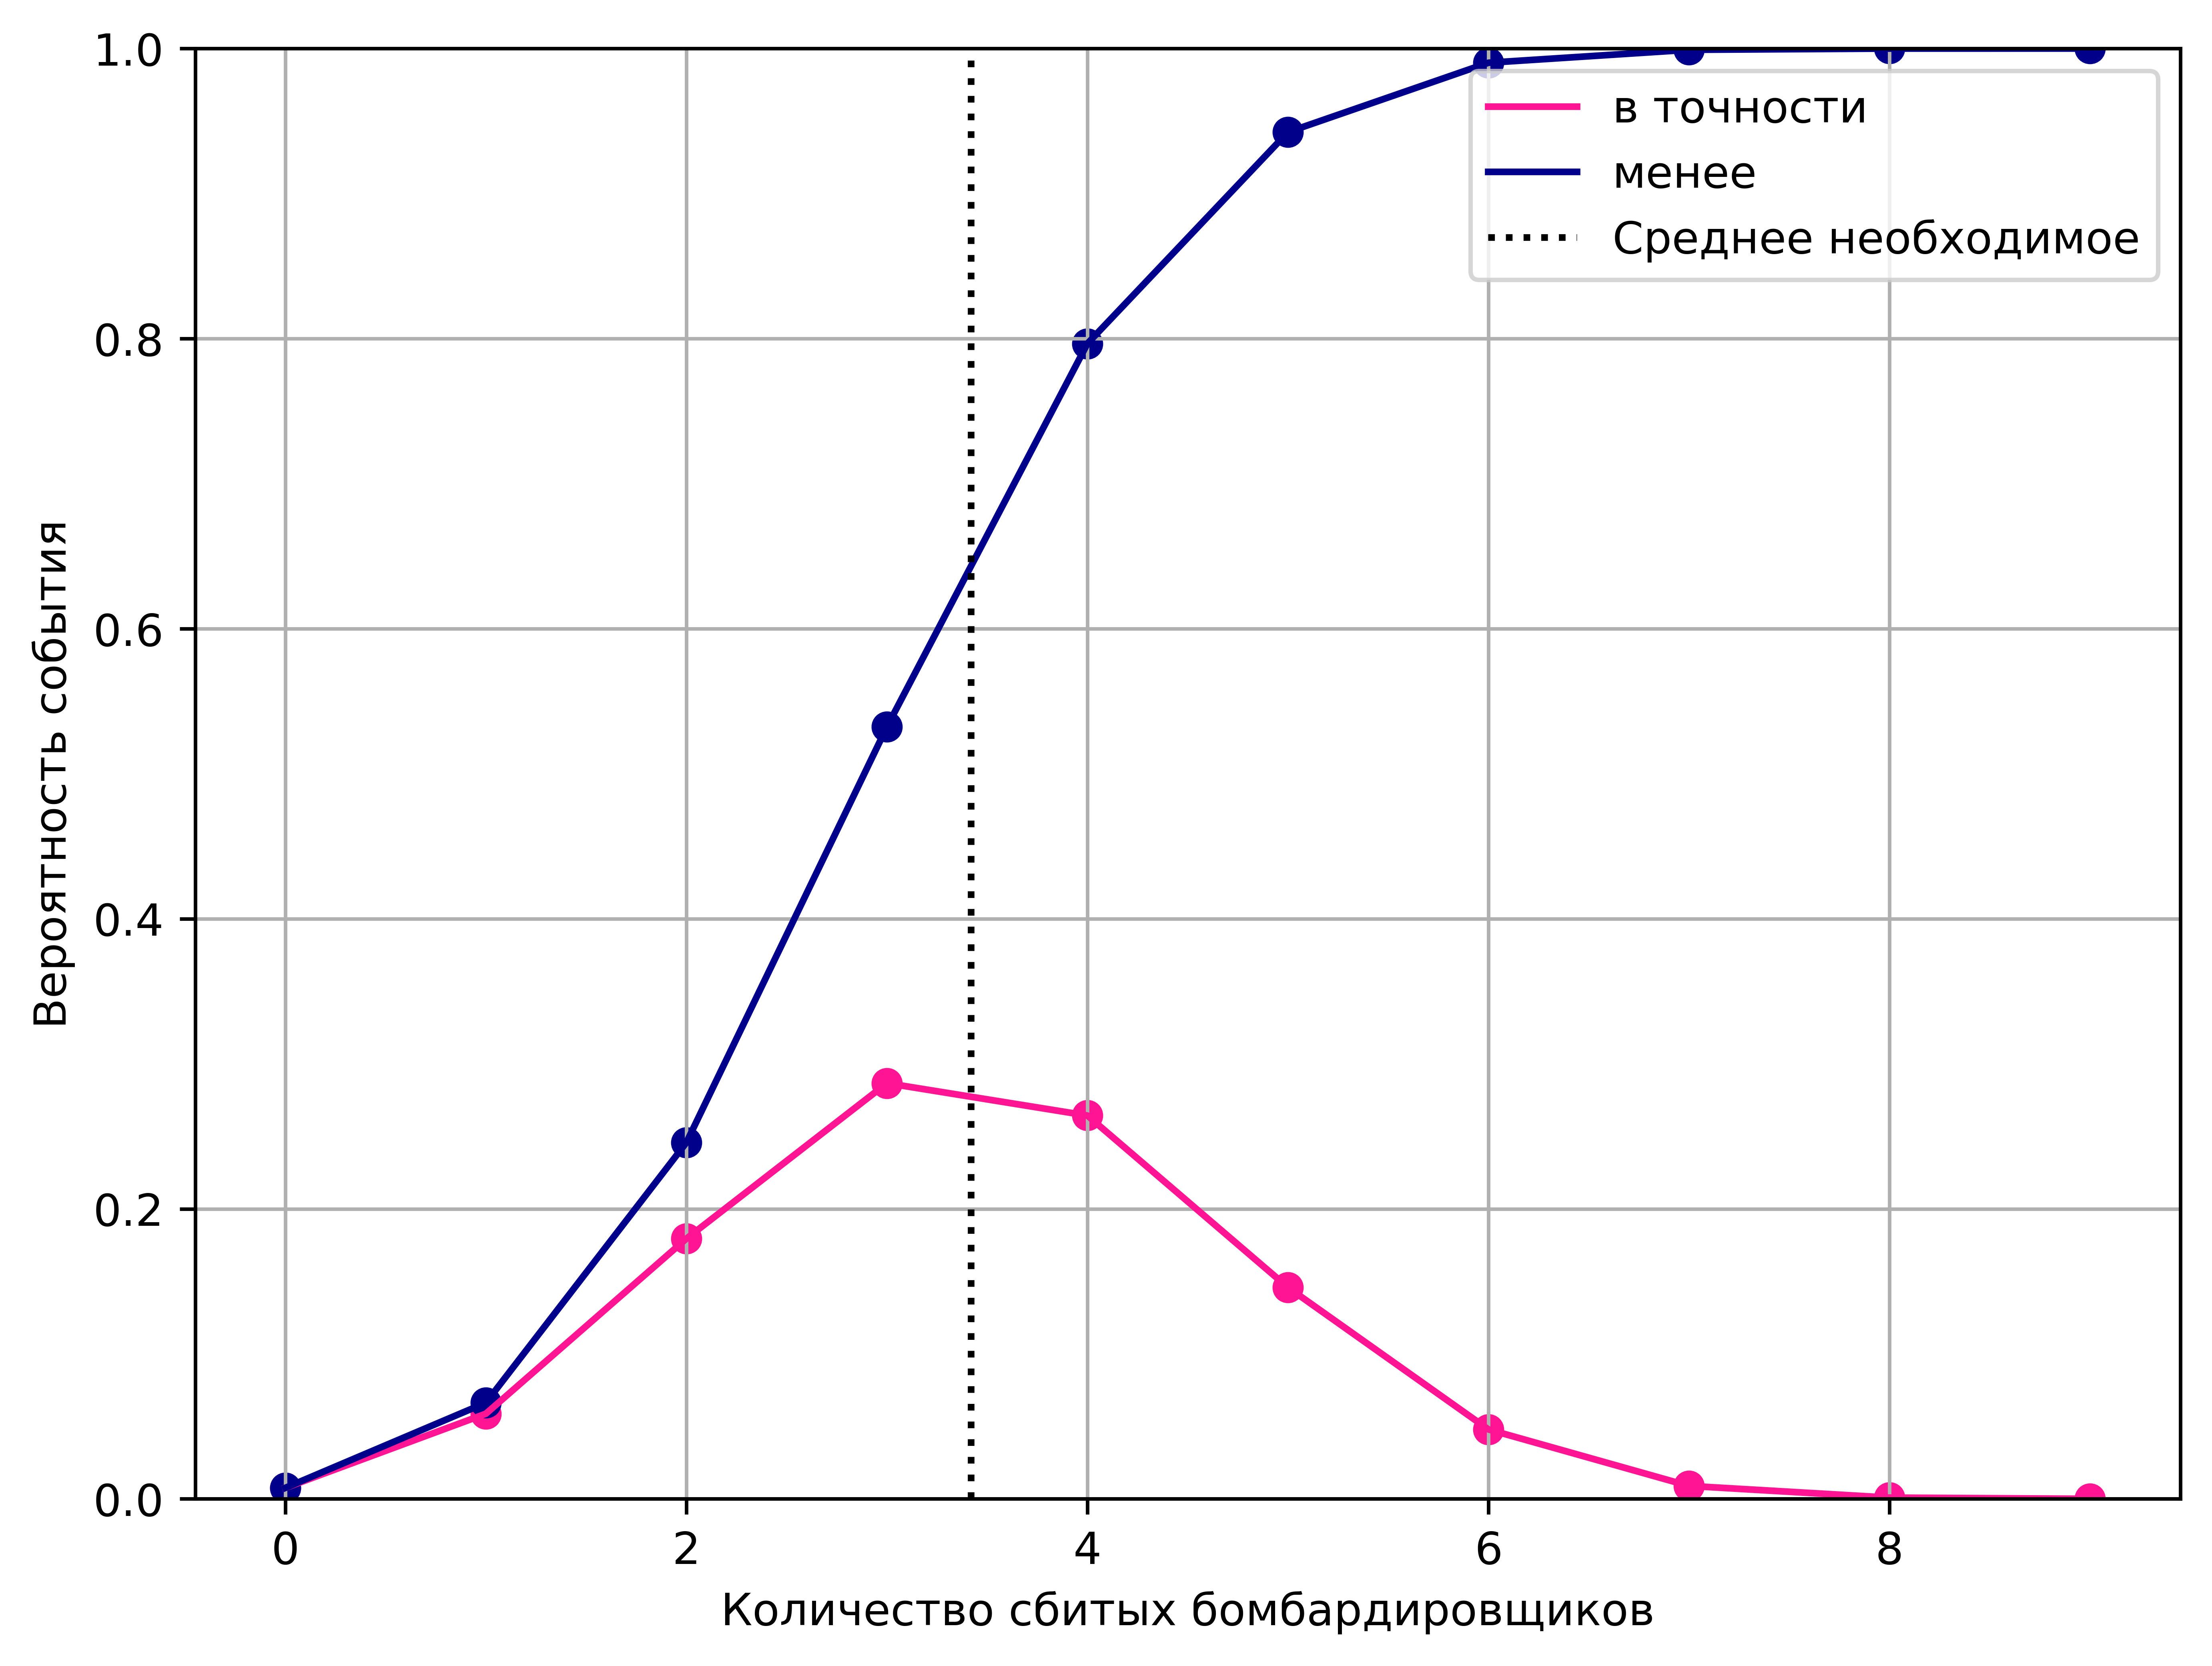

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)
plt.plot(P, label = 'в точности', color = 'deeppink')
plt.scatter(n, P, color = 'deeppink')
plt.plot(P_sum, label = 'менее', color = 'darkblue')
plt.scatter(n, P_sum, color = 'darkblue')
plt.ylim(0, 1)
plt.grid()
plt.vlines(m_sr, 0, 1, colors='black', linestyles=':', label='Среднее необходимое')
plt.xlabel('Количество cбитых бомбардировщиков')
plt.ylabel('Вероятность события')
plt.legend()
plt.show()